# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: Heisenberg

YOUR-IDs: 2021701002, 2021702009, 2021702017

YOUR-NAMEs: Laksh Nanwani, Arpit Sahni, Haasith Pasala

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589 & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405 & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
from helpers.func import make_gaussian

$$ y(a, m, s) = \frac{a}{s\sqrt{2\pi}} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right)$$
<br>
$$ r(a, m, s) = \left[ \frac{a}{s\sqrt{2\pi}} \exp\left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$
<br>
$$\mathbf{J}_r
= \left[ \frac{1}{s\sqrt{2\pi}} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^3\sqrt{2\pi}}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \left(\frac{(x-m)^2}{s^2} - 1\right)\frac{a}{s^2\sqrt{2\pi}}\exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$
<br>
$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$
<br>
$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$


In [3]:
def get_cost_gs(x_obs, y_obs, k):
    return np.linalg.norm(get_r_gs(x_obs, y_obs, k)) ** 2   # ||r||^2

def get_r_gs(x_obs, y_obs, k):
    return make_gaussian(x_obs, k[0][0], k[1][0], k[2][0]) - y_obs

def Jacobian_matrix_gs(x, k):
    a = k[0][0]
    m = k[1][0]
    s = k[2][0]
    exp_vector = (np.exp(-np.power(x - m, 2) / (2 * np.power(s, 2)))) / s / np.sqrt(2 * np.pi)
    c0 = exp_vector
    c1 = a * (x - m) * exp_vector / s**2
    c2 = ((x - m)**2 / s**2 - 1) * a * exp_vector / s
    J = np.hstack((c0, c1, c2))
    return J

In [4]:
def gradient_descent_gs(k0, x_obs, y_obs, lr, num_iter, tol, plot_cost = False):
    if(x_obs.ndim == 1):
        x_obs = np.array([x_obs]).T
    if(y_obs.ndim == 1):
        y_obs = np.array([y_obs]).T
        
    k = k0
    
    if plot_cost:
        x_plot = [0]
        y_plot = [get_cost_gs(x_obs, y_obs, k)]
        
    for i in range(num_iter):
        rk = get_r_gs(x_obs, y_obs, k)
        Jr = Jacobian_matrix_gs(x_obs, k)
        delta_k = - lr * (np.dot(Jr.T, rk))
        
        if np.all(np.abs(delta_k) <= tol):
            print(f"Delta_k becomes smaller than tolerance level at iteration {i}")
            break
            
        k = k + delta_k
        
        if plot_cost:
            x_plot.append(i)
            y_plot.append(get_cost_gs(x_obs, y_obs, k))
            
    if plot_cost:
        return (x_plot, y_plot)
    
    return k

In [5]:
k0_gs = np.array([[10, 13, 19.12]]).T
x_obs = np.array([[-25, 0, 25]]).T
y_obs = make_gaussian(x_obs, 10, 0, 20)
lr = 50
num_iter = 2000
tol = 1e-15
gradient_descent_gs(k0_gs, x_obs, y_obs, lr, num_iter, tol)

array([[10.00202461],
       [ 0.0225734 ],
       [20.00665144]])

In [6]:
tol = 1e-4
gradient_descent_gs(k0_gs, x_obs, y_obs, lr, num_iter, tol)

Delta_k becomes smaller than tolerance level at iteration 1906


array([[10.00276201],
       [ 0.03067463],
       [20.00908089]])

The lesser the value of tolerance, the more number of iterations GD can continue for.

In [7]:
a_gt = 10
m_gt = 0
s_gt = 20
k0_gs = np.array([[10, 13, 19.12]]).T
lr = 20
num_iter = 2000
tol = 1e-15
num_obs = 50
x_obs = np.linspace(-25, 25, num_obs)
y_obs = make_gaussian(x_obs, a_gt, m_gt, s_gt)

In [8]:
k = gradient_descent_gs(k0_gs, x_obs, y_obs, lr, num_iter, tol)
k

array([[1.00000001e+01],
       [5.18585477e-16],
       [2.00000003e+01]])

<a id='GD'></a>

##### For the initial estimates k = [ 10, 13, 19.12]

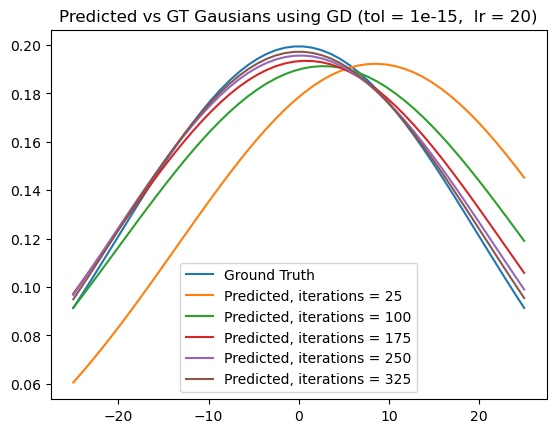

In [9]:
k0_gs = np.array([[10, 13, 19.12]]).T
lr = 20
tol = 1e-15

plt.plot(x_obs, y_obs, label = "Ground Truth")
for num_itr in range(25, 350, 75):
    k = gradient_descent_gs(k0_gs, x_obs, y_obs,lr, num_itr, tol)
    plt.plot(x_obs, make_gaussian(x_obs, k[0,0], k[1,0], k[2,0]), label = f"Predicted, iterations = {num_itr}")
plt.legend()
plt.title(f"Predicted vs GT Gausians using GD (tol = {tol},  lr = {lr})")
plt.show()

##### For the initial estimates of k = [ 2, 8, 10]

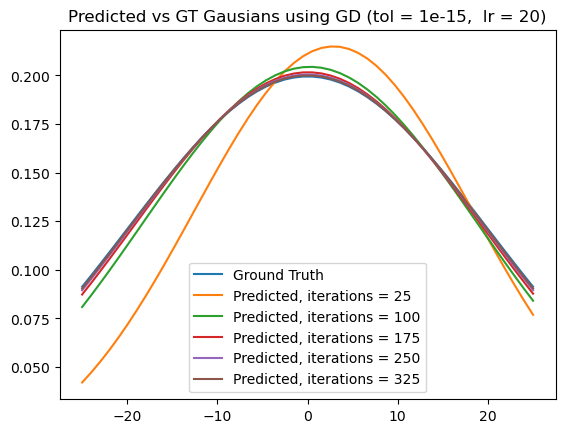

In [10]:
k0_gs = np.array([[2, 8, 10]]).T
lr = 20
tol = 1e-15

plt.plot(x_obs, y_obs, label = "Ground Truth")
for num_itr in range(25, 350, 75):
    k = gradient_descent_gs(k0_gs, x_obs, y_obs,lr, num_itr, tol)
    plt.plot(x_obs, make_gaussian(x_obs, k[0,0], k[1,0], k[2,0]), label = f"Predicted, iterations = {num_itr}")
plt.legend()
plt.title(f"Predicted vs GT Gausians using GD (tol = {tol},  lr = {lr})")
plt.show()

In [11]:
def plot_loss_vs_iterations_gs(k0, max_iter, min_lr, tol):
    lr = min_lr
    for i in range(4):
        xy = gradient_descent_gs(k0, x_obs, y_obs,lr, max_iter, tol, True)
        plt.plot(xy[0], xy[1], label = f"lr = {np.round(lr,6)}")
        lr *= 10
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.title(f"Cost vs iterations for GD (tol = {tol})")
    plt.show()

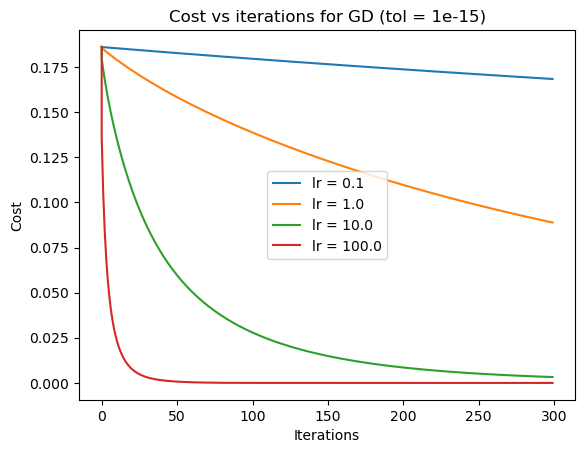

In [12]:
lr = 0.1
tol = 1e-15
k0_gs = np.array([[10, 13, 19.12]]).T
plot_loss_vs_iterations_gs(k0_gs, 300, lr, tol)

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [13]:
from helpers.func import make_non_linear

$$ y(p1, p2, p3, p4) = p1 \exp \left(\frac{-x}{p2}\right) + p3 \sin \left(\frac{x}{p4}\right)$$
<br>
$$ r(p1, p2, p3, p4) = \left[ p1 \exp \left(\frac{-x_{obs}}{p2}\right) + p3 \sin \left(\frac{x_{obs}}{p4}\right) - y_{obs}\ \right]$$
<br>
$$\mathbf{J}_r
= \left[ \exp \left(\frac{-x}{p2}\right); \frac{p1 * x}{p2^2} \exp\left(\frac{-x}{p2}\right);  \sin \left(\frac{x}{p4}\right);  \frac{-p3 * x}{p4^2}\cos \left(\frac{x}{p4}\right)\right]$$
<br>
$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$
<br>
$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$


In [14]:
def get_cost_nl(x_obs, y_obs, k):
    return np.linalg.norm(get_r_nl(x_obs, y_obs, k)) ** 2   # ||r||^2

def get_y_non_linear(x, p1, p2, p3, p4):
    y = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4)
    return y

def get_r_nl(x_obs, y_obs, k):
    return get_y_non_linear(x_obs,  k[0][0], k[1][0], k[2][0], k[3][0]) - y_obs

def Jacobian_matrix_nl(x, k):
    p1 = k[0][0]
    p2 = k[1][0]
    p3 = k[2][0]
    p4 = k[3][0]
    J = np.hstack((np.exp(-x/p2),
                   (p1/np.power(p2, 2)) * x * np.exp(-x/p2),
                   np.sin(x/p4),
                   (-p3/np.power(p4, 2)) * x * np.cos(x/p4)))
    return J

def gradient_descent_nl(k0, x_obs, y_obs, lr, num_iter, tol, plot_cost = False):
    if(x_obs.ndim == 1):
        x_obs = np.array([x_obs]).T
    if(y_obs.ndim == 1):
        y_obs = np.array([y_obs]).T
        
    k = k0
    
    if plot_cost:
        x_plot = [0]
        y_plot = [get_cost_nl(x_obs, y_obs, k)]
        
    for i in range(num_iter):
        rk = get_r_nl(x_obs, y_obs, k)
        Jr = Jacobian_matrix_nl(x_obs, k)
        delta_k = - lr * (np.dot(Jr.T, rk))
        
        if np.all(np.abs(delta_k) <= tol):
            print(f"Delta_k becomes smaller than tolerance level at iteration {i}")
            break
            
        k = k + delta_k
        
        if plot_cost:
            x_plot.append(i)
            y_plot.append(get_cost_nl(x_obs, y_obs, k))
            
    if plot_cost:
        return (x_plot, y_plot)
    
    return k

def plot_loss_vs_iterations_nl(k0, iter_, min_lr, tol):
    lr = min_lr
    
    for i in range(4):
        xy = gradient_descent_nl(k0, x_obs, y_obs,lr, iter_, tol, True)
        plt.plot(xy[0], xy[1], label = f"lr = {np.round(lr,7)}")
        lr *= 10
        
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.title(f"loss vs iterations for GD (tol = {tol})")
    plt.show()

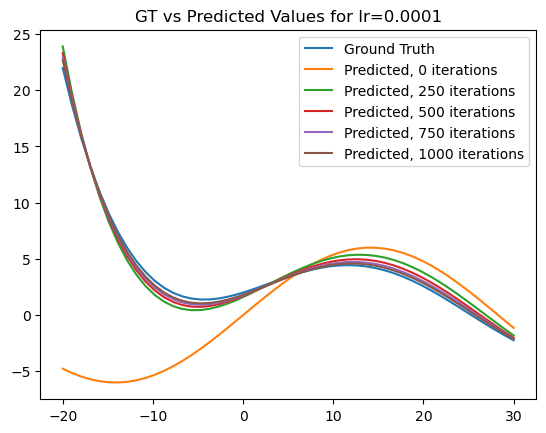

In [15]:
k_gt= np.array([[2, 8, 4, 8]]).T
k0_nl = np.array([[0, 7, 6, 9]]).T
num_obs = 50
lr = 0.0001
num_iter = 1000
tol = 1e-15
x_obs = np.linspace(-20, 30, num_obs)
y_obs = get_y_non_linear(x_obs, k_gt[0][0], k_gt[1][0], k_gt[2][0], k_gt[3][0])
plt.plot(x_obs,y_obs,label="Ground Truth")
for i in range(0, 1001, 250):
    k = gradient_descent_nl(k0_nl, x_obs, y_obs, lr, i, tol)
    y_predict = get_y_non_linear(x_obs, k[0][0], k[1][0], k[2][0], k[3][0])
    plt.plot(x_obs,y_predict,label=f"Predicted, {i} iterations")
plt.legend()
plt.title("GT vs Predicted Values for lr="+str(lr))
plt.show()

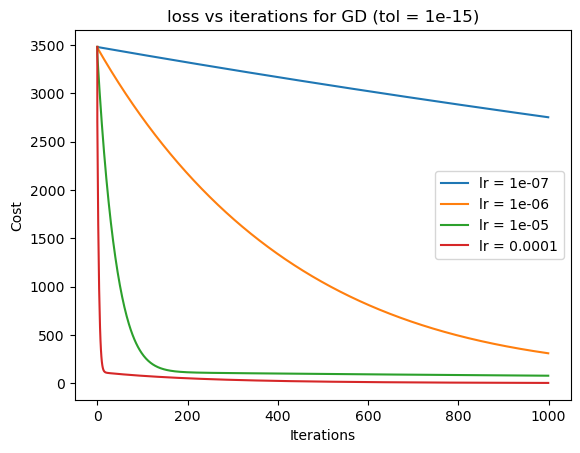

In [16]:
plot_loss_vs_iterations_nl(k0_nl, 1000, 0.0000001, tol)

<a id = "diff_optimizers"></a>

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent.

__Gauss Newton__ updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

In [17]:
def gauss_newton(k0, x_obs, y_obs, num_iter, tol):
    if(x_obs.ndim == 1):
        x_obs = np.array([x_obs]).T
    if(y_obs.ndim == 1):
        y_obs = np.array([y_obs]).T
    k = k0
    for i in range(num_iter):
        rk = get_r_gs(x_obs, y_obs, k)
        Jr = Jacobian_matrix_gs(x_obs, k)
        pinv_J = np.dot(np.linalg.inv(np.dot(Jr.T, Jr)), Jr.T)
        delta_k = -np.dot(pinv_J, rk)
        if (np.all(np.abs(delta_k)) <= tol):
            break
        k = k + delta_k
    return k

In [18]:
a_gt = 10
m_gt = 0
s_gt = 20
k0_gs = np.array([[10, 13, 19.12]]).T
num_iter = 6
tol = 1e-15
num_obs = 50
x_obs = np.linspace(-25, 25, num_obs)
y_obs = make_gaussian(x_obs, a_gt, m_gt, s_gt)

In [19]:
k = gauss_newton(k0_gs, x_obs, y_obs, num_iter, tol)
print(np.allclose(k, np.array([[a_gt, m_gt, s_gt]]).T))
k

True


array([[1.00000000e+01],
       [6.88136779e-15],
       [2.00000000e+01]])

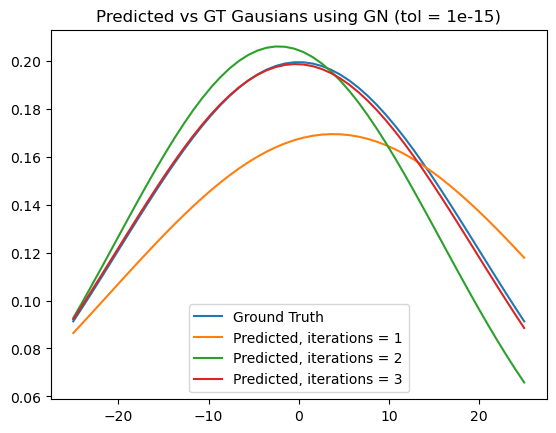

In [20]:
k0 = np.array([[10, 13, 19.12]]).T
tol = 1e-15
plt.plot(x_obs, y_obs, label = "Ground Truth")
for num_itr in range(1, 4):
    k = gauss_newton(k0_gs, x_obs, y_obs, num_itr, tol)
    plt.plot(x_obs, make_gaussian(x_obs, k[0,0], k[1,0], k[2,0]), label = f"Predicted, iterations = {num_itr}")
plt.legend()
plt.title(f"Predicted vs GT Gausians using GN (tol = {tol})")
plt.show()

In [21]:
def plot_loss_vs_iterations_GN(k0, max_iter, tol):
    x_plot = []
    y_plot = []
    for num_itr in range(max_iter):
        k = gauss_newton(k0, x_obs, y_obs, num_itr, tol)
        cost = get_cost_gs(x_obs, y_obs, k)
        x_plot.append(num_itr)
        y_plot.append(cost)
    plt.plot(x_plot, y_plot)
    plt.plot(x_plot, y_plot, 'o')
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"loss vs iterations for GN (tol = {tol})")
    plt.show()

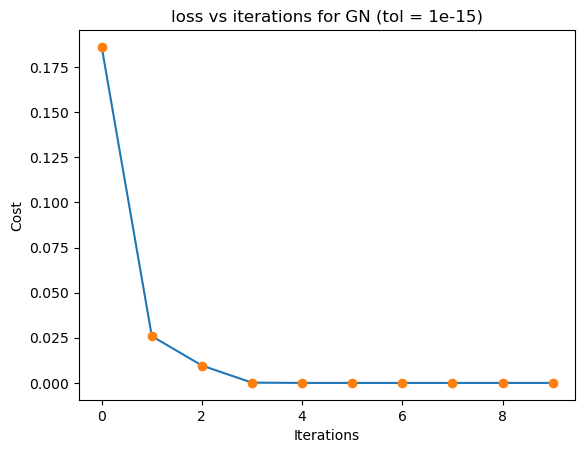

In [22]:
plot_loss_vs_iterations_GN(k0, 10, tol)

__Levenberg Marquardt__ lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

In [23]:
def levenberg_marquardt(k0, x_obs, y_obs, num_iter, lambda_, tol):
    if(x_obs.ndim == 1):
        x_obs = np.array([x_obs]).T
    if(y_obs.ndim == 1):
        y_obs = np.array([y_obs]).T
    k = k0
    for i in range(num_iter):
        rk = get_r_gs(x_obs, y_obs, k)
        Jr = Jacobian_matrix_gs(x_obs, k)
        pinv_J = np.dot(Jr.T, Jr)
        pinv_J = np.dot(np.linalg.inv(pinv_J + lambda_ * np.identity(pinv_J.shape[0])), Jr.T)
        delta_k = -np.dot(pinv_J, rk)
        if (max(np.abs(delta_k)) <= tol):
            break
        k = k + delta_k
    return k

In [24]:
a_gt = 10
m_gt = 0
s_gt = 20

k0_gs = np.array([[10, 13, 19.12]]).T
num_iter = 20
tol = 1e-15
lambda_ = 0.00001

num_obs = 50
x_obs = np.linspace(-25, 25, num_obs)
y_obs = make_gaussian(x_obs, a_gt, m_gt, s_gt)

In [25]:
k = levenberg_marquardt(k0, x_obs, y_obs, num_iter, lambda_, tol)
print(np.allclose(k, np.array([[a_gt, m_gt, s_gt]]).T))
k

True


array([[1.00000000e+01],
       [5.43893493e-16],
       [2.00000000e+01]])

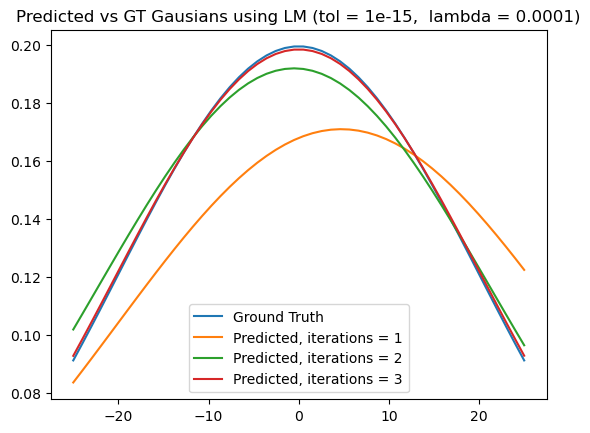

In [26]:
k0_gs = np.array([[10, 13, 19.12]]).T
lambda_ = 0.0001
tol = 1e-15

plt.plot(x_obs, y_obs, label = "Ground Truth")
for num_itr in range(1, 4):
    k = levenberg_marquardt(k0_gs, x_obs, y_obs, num_itr, lambda_, tol)
    plt.plot(x_obs, make_gaussian(x_obs, k[0,0], k[1,0], k[2,0]), label = f"Predicted, iterations = {num_itr}")
plt.legend()
plt.title(f"Predicted vs GT Gausians using LM (tol = {tol},  lambda = {lambda_})")
plt.show()

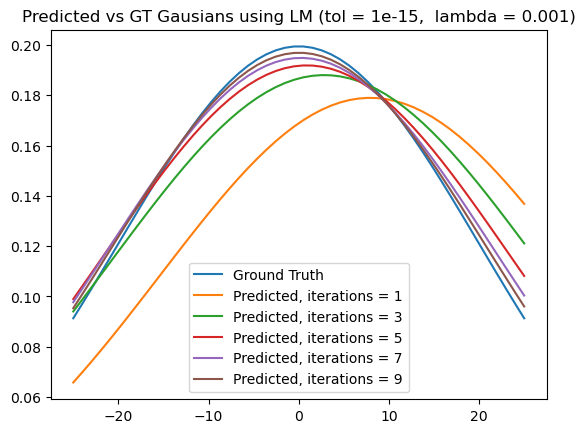

In [27]:
k0_gs = np.array([[10, 13, 19.12]]).T
lambda_ = 0.001
tol = 1e-15

plt.plot(x_obs, y_obs, label = "Ground Truth")
for num_itr in range(1, 10, 2):
    k = levenberg_marquardt(k0_gs, x_obs, y_obs, num_itr, lambda_, tol)
    plt.plot(x_obs, make_gaussian(x_obs, k[0,0], k[1,0], k[2,0]), label = f"Predicted, iterations = {num_itr}")
plt.legend()
plt.title(f"Predicted vs GT Gausians using LM (tol = {tol},  lambda = {lambda_})")
plt.show()

In [28]:
def plot_loss_vs_iterations_LM(k0, max_iter, min_lambda, tol):
    l_ = min_lambda
    for i in range(5):
        x_plot = []
        y_plot = []
        for num_itr in range(max_iter):
            k = levenberg_marquardt(k0, x_obs, y_obs, num_itr, l_, tol)
            cost = get_cost_gs(x_obs, y_obs, k)
            x_plot.append(num_itr)
            y_plot.append(cost)

        plt.plot(x_plot, y_plot, label = f"lambda = {l_}")
        plt.plot(x_plot, y_plot, 'o')
        l_ *= 10
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.title(f"loss vs iterations for LM (tol = {tol})")
    plt.show()

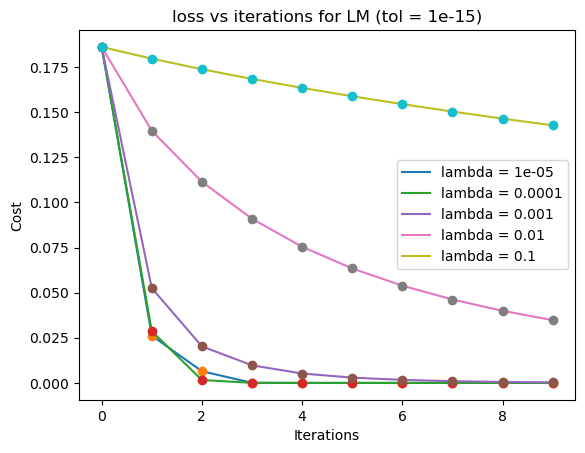

In [29]:
plot_loss_vs_iterations_LM(k0, 10, 0.00001, tol)

### Questions
#### 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.

__Ans:__ 

__Learning Rate:__ This is responsible for the faster convergence to the minima. It effects how fast we reach convergence and also the possibility of minimizing the cost function. If the learning rate is way too large, we may overshoot and start diverging, hence never converging to the minima. But if the learning rate is very small, it may take more time to converge to a minima.

__Initial Estimate:__ Selecting the intial estimate is a crucial step as reaching (or not) a convergence point depends on this. The initial estimate must be near to the optimal value, as by taking a farther point as initial guess may lead to slower convergence, more computations, or never reaching the global minima (because we get stuck in a local minima).

The plots can be observed from [here](#GD) onwards  

#### 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

__Ans:__ The Gradient Descent takes comparitively more number of iterations to reach convergence. But Gauss-Newton and Levenberg-Marquardt achieve convergence faster than Gradient descent. In Gauss-Newton, we use the second derivates to reach the minima due to which we observe a rapid convergence. In case of Levenberg-Marquardt algorithm, it is a combination of the above two algorithms. Hence, it shows a fast convergence (between GD and GN).

The plots can be observed from [here](#diff_optimizers) onwards.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

#### 1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.

In [30]:
import open3d as o3d
import copy

In [31]:
# MSE
def alignment_error(pcd1, pcd2):
    points_diff = np.array(pcd1.points) - np.array(pcd2.points)
    mse = (points_diff ** 2).mean()
    return mse

In [32]:
# returns transformation matrix T s.t. pcd_transformed = T * pcd_original
#3d
def procustes_alignment(points_o, points_t, correspondences_indices_t = []):
    p_o = points_o.T      # d*N matrix
    if correspondences_indices_t:
        p_t = points_t[correspondences_indices_t].T
    else:
        p_t = points_t.T
        
    assert p_o.shape == p_t.shape
    
    o_centroid = np.mean(p_o, axis = 1)
    o_centroid = o_centroid.reshape(len(o_centroid), 1)
    
    t_centroid = np.mean(p_t, axis = 1)
    t_centroid = t_centroid.reshape(len(t_centroid), 1)
    
    p_o = p_o - o_centroid
    p_t = p_t - t_centroid
    
    BA_T = np.dot(p_o, p_t.T)
    U, S, V_T = np.linalg.svd(BA_T, full_matrices = False)
    
    # ensures determinant of R = 1
    det_1_matrix = np.identity(3)
    det_1_matrix[2,2] = np.linalg.det(np.dot(U, V_T))  
    R = np.dot(V_T.T, np.dot(det_1_matrix, U.T))
    
    t = t_centroid - np.dot(R, o_centroid)
    return np.vstack((np.hstack((R, t)), [0, 0, 0, 1]))

#### 2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.

In [33]:
pcd_o = o3d.io.read_triangle_mesh("data/bunny.ply").sample_points_uniformly(2000)
pcd_o_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.03, origin = pcd_o.get_center())
points_o = np.array(pcd_o.points)
R = pcd_o.get_rotation_matrix_from_xyz([np.pi/2, np.pi/3, np.pi/4])
t = np.array([[2,1,0]]).T
T = np.vstack((np.hstack((R, t)), [0, 0, 0, 1]))
pcd_t = copy.deepcopy(pcd_o).transform(T)
pcd_t_frame = copy.deepcopy(pcd_o_frame).transform(T)
points_t = np.array(pcd_t.points)

In [34]:
T_pro = procustes_alignment(points_t, points_o)
pcd_procustes = copy.deepcopy(pcd_t).transform(T_pro).paint_uniform_color([0,0,1])
pcd_procustes_frame = copy.deepcopy(pcd_t_frame).transform(T_pro).paint_uniform_color([0,0,1])

pcd_visualise = copy.deepcopy(pcd_procustes).translate(np.array([[0.0001,0,0]]).T)
pcd_visualise_frame = copy.deepcopy(pcd_procustes_frame).translate(np.array([[0.0001,0,0]]).T)
o3d.visualization.draw_geometries([pcd_o, pcd_visualise, pcd_o_frame, pcd_visualise_frame])
# rotating the image will change the color, hence showing that the images have aligned

In [35]:
print(T ,"\n\n", T_pro)

[[ 3.53553391e-01 -3.53553391e-01  8.66025404e-01  2.00000000e+00]
 [ 6.12372436e-01 -6.12372436e-01 -5.00000000e-01  1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  3.06161700e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

 [[ 3.53553391e-01  6.12372436e-01  7.07106781e-01 -1.31947922e+00]
 [-3.53553391e-01 -6.12372436e-01  7.07106781e-01  1.31947922e+00]
 [ 8.66025404e-01 -5.00000000e-01 -1.11022302e-16 -1.23205081e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [36]:
alignment_error(pcd_o, pcd_procustes)

5.741797375708315e-32

#### 3. Make sure your code is modular as we will use this function in the next sub-part.


#### 4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.

Given we have corresponding points x<sub>n</sub>, y<sub>n</sub> of the two-point clouds, respectively. The points x<sub>n</sub> are of the point cloud, which we want to align with the point cloud having y<sub>n</sub>. Upon doing the transformation of the rigid body with R,t as parameters, we can align both the point clouds as shown below:
\begin{equation*}
\bar{x_n} = Rx_n +t 
\label{eq:x_bar_n} \tag{1}
\end{equation*}

So that the weighted sum of squared errors is minimized,
$$ \Sigma||y_n - \bar{x_n}||^2$$

Now we use the set of points {y<sub>n</sub>} as the local coordinates. We set the origin as the weighted mean of {y<sub>n</sub>} computed as,

$$ \begin{align*}\label{eq1} y_o = \frac{\Sigma y_n}{N}  \end{align*} $$

So now we have to minimize,
$$\Sigma ||y_n - Rx_n - t||$$
now add and subtract by y<sub>o</sub>

\begin{equation*}
\Sigma||y_n - y_o - Rx_n - t + y_o||
\label{eq:summation} \tag{2}
\end{equation*}

From $\eqref{eq:x_bar_n}$,
$$\bar{x_n} = Rx_n +t $$

Now shift to the origin

\begin{align*}
\bar{x_n} -y_o &= Rx_n +t - y_o \\
\bar{x_n} -y_o &= R\left(x_n + R^Tt - R^Ty_o\right)\\
\text{let we assume, }
x_o &= -R^T\left(t - y_o\right)\\
\bar x_n - y_o &= R\left(x_n - x_o\right)
\end{align*}

now from $\eqref{eq:summation}$,

\begin{equation*}
\Sigma||y_n - y_o - Rx_n - t + y_o||
\end{equation*}

we need to find the R and x<sub>o</sub> such that the above equation is minimum.

\begin{align*}
R^*,x_o^* &= argmin \Sigma ||y_n - y_o R\left( x_n - x_o \right)||^2 \\
\text{let,  } \phi(x_o,R) &= \Sigma[(y_n - y_o) - R(x_n - x_o)]^T [(y_n - y_o) - R(x_n - x_o)] \\
&= \Sigma (y_n - y_o)^T(y_n - y_o) + \Sigma (x_n - x_o)^T(x_n - x_o) - 2\Sigma (y_n - y_o)R^T(x_n - x_o)
\end{align*}

now differentiate w.r.t to x<sub>o</sub>

\begin{align*}
\frac{\partial(x_o,R)}{\partial x_o} &= -2\Sigma(x_n - x_o) + 2\Sigma R^T(y_n - y_o)
\end{align*}

now equate it to zero,
\begin{align*}
\frac{\partial(x_o,R)}{\partial x_o} &= 0\\
\Sigma(x_n - x_o) &= \Sigma R^T(y_n - y_o)
\end{align*}

The R.H.S of the above equation is zero as y<sub>o</sub> is the weighted mean of y<sub>n</sub>. Therefore,

\begin{align*}
\Sigma (x_n - x_o) &= 0 \\
\Sigma x_n - \Sigma x_o &= 0\\
x_o &= \frac{\Sigma x_n}{N}
\end{align*}

Here, we got the optimal value of x<sub>o</sub> is the weighted mean of the points x<sub>n</sub>.

Now, differentiate w.r.t. to R,
\begin{align*}
\phi(x_o,R) &= \Sigma (y_n - y_o)^T(y_n - y_o) + \Sigma (x_n - x_o)^T(x_n - x_o) - 2\Sigma (y_n - y_o)R^T(x_n - x_o)
\end{align*}

As we can see the first two terms in the above equation are independent of R. To minimize this, R must be maximized.

Already we know x<sub>o</sub>, compute mean-reduced coordinates as ,
\begin{align*}
a_n &= (x_n - x_o)\\
b_n &= (y_n - y_o)
\end{align*}

This leads to the compact form,
\begin{align*}
R^* &= argmax\Sigma b_n^T R a_n
\end{align*}
Using trace as,
\begin{align*}
R^* &= argmax\Sigma tr(RH)\\
\text{Where, } H &= \Sigma(a_nb_n^T)
\end{align*}
Now we need to find R so that it maximizes the tr(RH)

we find the SVD of H,

\begin{align*}
SVD(H) &= UDV^T \\
\text{with }& U^TU =I ,V^TV = I, D = diag(d_i)
\end{align*}

Now lets put, $$R = VU^T$$

\begin{align*}
tr(RH^T) &= tr((VU^T)(VDU^T))\\
&= tr(V(U^TU) DV^T)\\
&= tr(VDV^T)\\
&= tr(VD^\frac{1}{2}D^\frac{1}{2}V^T)\\
\text{As D i a diagonal matrix, } & \\
tr(VD^\frac{1}{2}D^\frac{1}{2}V^T) &= tr(VD^\frac{1}{2}(D^\frac{1}{2}V^T))
\text{with definition } A = VD^\frac{1}{2} \\
tr(RH) &= tr(AA^T)
\end{align*}

As A is a positive definite matrix which is a result of V,D stems from SVD. For every posiive definite matrix A holds this inequality,
$$ tr(AA^T) \geq tr(R'AA^T)$$

By the result of Schwarz Inequality, this means

\begin{align*}
tr(RH) &= tr(AA^T) \geq tr(R'AA^T) \\
&= tr(R'RH)\\
\end{align*}
\begin{align*}
&\text{So from above, we can conclude that our choice } R=VU^T
\text{was the optimal value of R that maximizes the trace.}\\
&\text{Hence, } R = VU^T \text{is the optimal value for minimizing } \phi
\end{align*}

Based on x<sub>o</sub> and R, we can complete the translational vector 't' of our rigid body transformation.
$$ x_o = R^Ty_o - R^Tt$$
$$ t = y_o - Rx_o$$

So from the values of R and t which we obtained above. We can conclude that this algorithm will be the best way to get alignment with known correspondences by the procedure we used above.

## 2.2: ICP alignment

#### 1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.

In [37]:
# min distance, returns index
def nearest_neighbour_index(p1, points2):
    dist = np.sum((points2 - p1)**2, axis=1)
    return np.argmin(dist)

In [38]:
# tries aligning pcd_original to pcd_t
# returns T st pcd_t = T * pcd_original
def icp(pcd_original, pcd_t, tol, iterations, shuffle = True):
    points_t = np.array(pcd_t.points)
    pcd_o = copy.deepcopy(pcd_original)
    T = np.identity(4)
    
    for iteri in range(iterations):
        points_o = np.array(pcd_o.points)
        if shuffle:
            np.random.shuffle(points_o)
        cor_indices = [nearest_neighbour_index(p.reshape(1,3), points_t) for p in points_o]
        T_temp = procustes_alignment(points_o,  points_t, cor_indices)
        pcd_o.transform(T_temp)
        T = np.dot(T_temp, T)
        if alignment_error(pcd_o, pcd_t) < tol:
            break
    return T

#### 2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.

In [39]:
pcd_o = o3d.io.read_triangle_mesh("data/bunny.ply").sample_points_uniformly(1000)
pcd_o_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.03, origin = pcd_o.get_center())
R = pcd_o.get_rotation_matrix_from_xyz([np.pi/9, np.pi/9, np.pi/9])
t = np.array([[0.1,0.1,0]]).T
T = np.vstack((np.hstack((R, t)), [0, 0, 0, 1]))
pcd_t = copy.deepcopy(pcd_o).transform(T)
pcd_o_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.03, origin = pcd_o.get_center())
pcd_t_frame = copy.deepcopy(pcd_o_frame).transform(T)

In [40]:
o3d.visualization.draw_geometries([pcd_t, pcd_o, pcd_o_frame, pcd_t_frame])

In [41]:
T_icp = icp(pcd_t, pcd_o, 1e-7, 16)
pcd_icp = copy.deepcopy(pcd_t).transform(T_icp).paint_uniform_color([0,0,1])
pcd_icp_frame = copy.deepcopy(pcd_t_frame).transform(T_icp).paint_uniform_color([0,0,1])
o3d.visualization.draw_geometries([pcd_o, pcd_icp, pcd_o_frame, pcd_icp_frame])
print(f"T = \n{T}\n")
print(f"T_icp = \n{T_icp}")

T = 
[[ 0.88302222 -0.3213938   0.34202014  0.1       ]
 [ 0.43131696  0.84301347 -0.3213938   0.1       ]
 [-0.18503361  0.43131696  0.88302222  0.        ]
 [ 0.          0.          0.          1.        ]]

T_icp = 
[[ 0.88648514  0.42509595 -0.18285932 -0.13056039]
 [-0.31729625  0.84600172  0.42849059 -0.05285509]
 [ 0.33684892 -0.32182996  0.8848493  -0.00171999]
 [ 0.          0.          0.          1.        ]]


In [42]:
import time

In [43]:
v = o3d.visualization.Visualizer()
v.create_window()
v.add_geometry(pcd_o)
v.add_geometry(pcd_o_frame)
pcd_icp = copy.deepcopy(pcd_t).paint_uniform_color([0.5, 0, 0.5])
pcd_icp_frame = copy.deepcopy(pcd_t_frame).paint_uniform_color([0,0,1])
v.add_geometry(pcd_icp)
v.add_geometry(pcd_icp_frame)

k = 20
iterations = np.arange(k+1, dtype = int)
costs = [alignment_error(pcd_o, pcd_icp)]

for i in range(k):
    T_icp = icp(pcd_icp, pcd_o, 0.01, 1)
    pcd_icp.transform(T_icp)
    pcd_icp_frame.transform(T_icp)
    v.update_geometry(pcd_icp)
    v.update_geometry(pcd_icp_frame)
    costs.append(alignment_error(pcd_o, pcd_icp))
    v.poll_events()
    v.update_renderer()
    time.sleep(0.2)

v.run()
v.destroy_window()

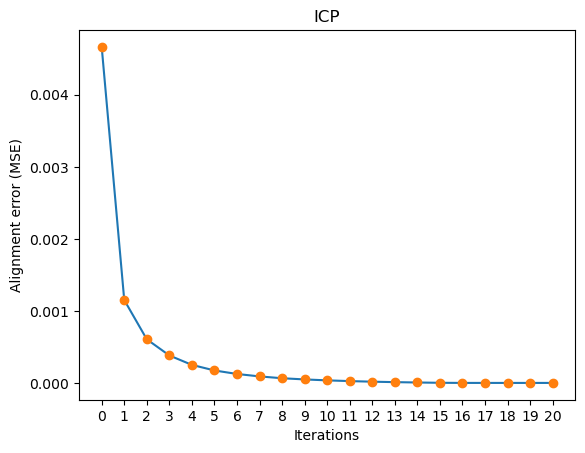

In [44]:
plt.plot(iterations, costs)
plt.plot(iterations, costs, 'o')
plt.xlabel("Iterations")
plt.xticks(iterations)
plt.ylabel("Alignment error (MSE)")
plt.title("ICP")
plt.show()

#### 3. Does ICP always give the correct alignment? Why or Why not?

__Ans:__ No the ICP algo will not always give the right alignment. When the point clouds aren't close enough, ICP might end up with incorrect correspondences (using nearest neighbour in our case) which affect the final alignment. See the figure below.
<img src="helpers/ICP_incorrect.png" alt="ICP incorrect alignment" style="height: 100px; width:100px;"/>
Image source - Lecture Slides

<br>Refer the below code as an example

In [45]:
pcd_o = o3d.io.read_triangle_mesh("data/bunny.ply").sample_points_uniformly(1000)
R = pcd_o.get_rotation_matrix_from_xyz([np.pi/9, np.pi/9, np.pi/2])
t = np.array([[0.1,0.1,0]]).T
T = np.vstack((np.hstack((R, t)), [0, 0, 0, 1]))
pcd_t = copy.deepcopy(pcd_o).transform(T).paint_uniform_color([0,0,1])
pcd_o_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.03, origin = pcd_o.get_center())
pcd_t_frame = copy.deepcopy(pcd_o_frame).transform(T)

In [46]:
o3d.visualization.draw_geometries([pcd_t, pcd_o, pcd_o_frame, pcd_t_frame])

In [47]:
T_icp = icp(pcd_t, pcd_o, 1e-7, 50)
pcd_icp = copy.deepcopy(pcd_t).transform(T_icp).paint_uniform_color([0,0,1])
pcd_icp_frame = copy.deepcopy(pcd_t_frame).transform(T_icp)

# pcd_visualise = copy.deepcopy(pcd_icp) #.translate(np.array([[0.0001,0,0]]).T)
o3d.visualization.draw_geometries([pcd_o, pcd_icp, pcd_o_frame, pcd_icp_frame])

print(f"T = \n{T}\n")
print(f"T_icp = \n{T_icp}")

T = 
[[ 5.75395780e-17 -9.39692621e-01  3.42020143e-01  1.00000000e-01]
 [ 9.39692621e-01 -1.16977778e-01 -3.21393805e-01  1.00000000e-01]
 [ 3.42020143e-01  3.21393805e-01  8.83022222e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

T_icp = 
[[ 0.99413504  0.09687858 -0.04806311 -0.03029725]
 [-0.06267879  0.87832071  0.47394524  0.00706143]
 [ 0.08812997 -0.46815304  0.87924163  0.01641804]
 [ 0.          0.          0.          1.        ]]


In [48]:
v = o3d.visualization.Visualizer()
v.create_window()
v.add_geometry(pcd_o)
v.add_geometry(pcd_o_frame)
pcd_icp = copy.deepcopy(pcd_t).paint_uniform_color([0.5, 0, 0.5])
v.add_geometry(pcd_icp)
pcd_icp_frame = copy.deepcopy(pcd_t_frame)
v.add_geometry(pcd_icp_frame)

k = 50
iterations = np.arange(k+1, dtype = int)
costs = [alignment_error(pcd_o, pcd_icp)]

for i in range(k):
    T_icp = icp(pcd_icp, pcd_o, 0.01, 1)
    pcd_icp.transform(T_icp)
    pcd_icp_frame.transform(T_icp)
    v.update_geometry(pcd_icp)
    v.update_geometry(pcd_icp_frame)
    costs.append(alignment_error(pcd_o, pcd_icp))
    v.poll_events()
    v.update_renderer()
    time.sleep(0.2)

v.run()
v.destroy_window()

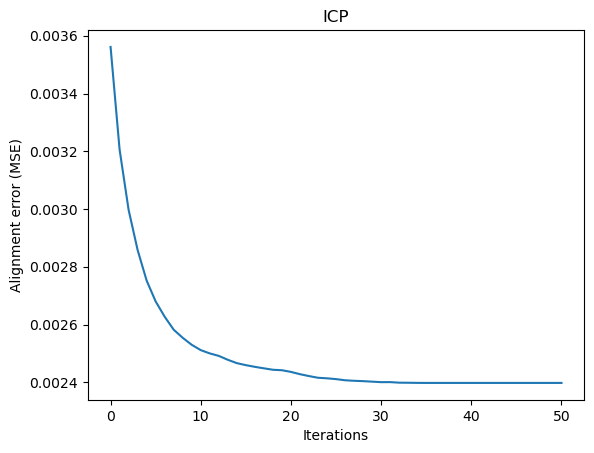

In [49]:
plt.plot(iterations, costs)
# plt.plot(iterations, costs, 'o')
plt.xlabel("Iterations")
# plt.xticks(iterations)
plt.ylabel("Alignment error (MSE)")
plt.title("ICP")
plt.show()

As can be seen in the above example, the alignment error converges but far away from zero, indicating wrong alignment.

#### 4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

__Ans:__ 
The Variants of ICP are :
1) Point-to-point </br>
2) Point-to-plane </br>
3) Generalised-ICP</br>
4) Point-to-line </br>

Point-to-plane is helpful in increasing the convergence speeds more than that of point-to-point ICP. Unlike point-to-point, we don't need to have the corresponding points of the two objects to be same but only that the points have to belong to same surface. 

---